# Use Case: Outlier Analysis

## Step 1: Importing Packages and setting up your notebook

An outlier analysis is used to find and look at data in a set that does not appear to fit into the distribution of the rest of the graph. In this tutorial we will be looking for genes that express at abnormally high levels. \[ insert description of what we do here\]

We will start by importing a few important packages for data analysis, visualization, and a few packages specific to outlier analysis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import binarization_functions as bf
import deva

In this tutorial, we will be exploring the ovarian cancer dataset.

In [3]:
import cptac
ov = cptac.Ovarian()

In this analysis we will be exploring how various clinical attributes effect the Proteomic data, so let's save those data frames as variables.

In [60]:
proteomics = ov.get_proteomics()
clinical = ov.get_clinical()

## Step 2: Choosing Attributes

Next we need to pick what attributes we want to look at. Let's start by looking at the columns in the clinical data frame and pick a couple that we find interesting.

In [5]:
clinical.columns

Index(['Patient_ID', 'Sample_Tumor_Normal', 'Participant_Procurement_Age',
       'Participant_Gender', 'Participant_Race', 'Participant_Ethnicity',
       'Participant_Jewish_Heritage', 'Participant_History_Malignancy',
       'Participant_History_Chemotherapy',
       'Participant_History_Neo-adjuvant_Treatment',
       'Participant_History_Radiation_Therapy',
       'Participant_History_Hormonal_Therapy', 'Aliquots_Plasma',
       'Blood_Collection_Time', 'Blood_Collection_Method', 'Anesthesia_Time',
       'Tumor_Surgical_Devascularized_Time', 'Tumor_Sample_Number',
       'Tumor_Sample_1_Weight', 'Tumor_Sample_1_LN2_Time',
       'Tumor_Sample_1_Ischemia_Time', 'Tumor_Sample_2_Weight',
       'Tumor_Sample_2_LN2_Time', 'Tumor_Sample_2_Ischemia_Time',
       'Tumor_Sample_3_Weight', 'Tumor_Sample_3_LN2_Time',
       'Tumor_Sample_3_Ischemia_Time', 'Tumor_Sample_4_Weight',
       'Tumor_Sample_4_LN2_Time', 'Tumor_Sample_4_Ischemia_Time',
       'Tumor_Sample_5_Weight', 'Tumor_Sample

As we look at this list, we want to keep in mind that for the outlier analysis we will want to use data that is binary, or that we can turn into binary data.

As I looked at the list, I complied a list of columns that I found interesting and would like to take a closer look at. 

In [6]:
columns_to_explore = ['Participant_Procurement_Age',
                      'Tumor_Status',
                      'Tumor_Grade',
                      'Histological_Subtype',
                      'Anatomic_Site_Tumor',
                      'Origin_Site_Disease',
                      'Participant_Gender',
                      'Tumor_Stage_Ovary_FIGO']

Next I'm going to look at these columns one by one to determine if I really want to use them in my analysis. Let's first look at all the unique values in the various dataframes.

In [7]:
clinical.Participant_Procurement_Age.unique()

array([ 540.,  820.,  665.,  625.,  828.,  672.,  535.,  694.,  707.,
        693.,  932.,  585.,  886.,  780.,  614.,  849.,  612.,  652.,
        826.,  653.,  782.,  933.,  529.,  600.,  898.,  706.,  559.,
        687.,  741.,  790.,  503.,  673.,  439.,  639.,  732.,  605.,
        650.,  870.,  637., 1031.,  701.,  761.,  448.,  580.,  712.,
        717.,  692.,  472.,  863.,  552.,  840.,  827.,  762.,  663.,
        720.,  765.,  887.,  695.,  522.,  747.,  763.,  854.,  606.,
        789.,  792.,  634.,  684.,  842.,  688.,  528.,  679.,  583.,
        668.,  753.,  861.,  954.,  591.,  802.,  759.,  801.,  620.,
        527.,  908.,  656.,  733.,  843.,  729.,  728.,  686.,  769.,
        897.,   nan])

This data is not I would have expected. I guess these might be by month. Let's look at some others.

In [8]:
clinical.Tumor_Status.unique()

array(['Tumor free', 'Not Reported/Unknown', 'With tumor', nan],
      dtype=object)

So, this looks pretty close to being binary! Maybe this is one we should look at.

In [9]:
clinical.Tumor_Grade.unique()

array(['G3', nan, 'GB', 'G2', 'G1', 'GX', 'Not Reported/ Unknown'],
      dtype=object)

So this is really interesting, but may be a little difficult to make binary.

In [10]:
clinical.Histological_Subtype.unique()

array(['Serous Adenocarcinoma', nan], dtype=object)

So there is not a lot here to actually look at.

In [11]:
clinical.Anatomic_Site_Tumor.unique()

array(['Omentum', 'Ovary', 'Pelvic mass', 'Peritoneum', nan,
       'Not Reported/ Unknown'], dtype=object)

I actually think this is very interesting, but it may be a little difficult to make binary

In [12]:
clinical.Origin_Site_Disease.unique()

array(['Ovary', 'Peritoneum', 'Fallopian tube', nan], dtype=object)

I think this is also very interesting. We just need to find a way to make it binary.

In [13]:
clinical.Participant_Gender.unique()

array(['Female', nan], dtype=object)

In [14]:
clinical.Tumor_Stage_Ovary_FIGO.unique()

array(['IIIC', 'IV', 'III', 'IIIA', nan, 'IIIB', 'IC', 'IIB',
       'Not Reported/ Unknown'], dtype=object)

Now that we have looked at some different data, let's choose what we would like to work with. For this experiment I am going to choose to look at Origin_Site_Disease. In a typical Outlier Analysis, you may choose to look at multiple columns.

Next, let's save this data in a table, and make the data binary. We will use the binarize_annotations function from the deva package to help us achieve this. 

In [61]:
annotations = clinical[['Origin_Site_Disease', 'Tumor_Grade', 'Tumor_Stage_Ovary_FIGO']].copy()
annotations = deva.binarize_annotations(annotations)
annotations.head()

,Origin_Site_Disease_Ovary,Origin_Site_Disease_Fallopian tube,Origin_Site_Disease_Peritoneum,Tumor_Grade_G3,Tumor_Grade_Not Reported/ Unknown,Tumor_Grade_G2,Tumor_Grade_G1,Tumor_Grade_GB,Tumor_Grade_GX,Tumor_Stage_Ovary_FIGO_IIIC,Tumor_Stage_Ovary_FIGO_IV,Tumor_Stage_Ovary_FIGO_IIIB,Tumor_Stage_Ovary_FIGO_Not Reported/ Unknown,Tumor_Stage_Ovary_FIGO_IIIA,Tumor_Stage_Ovary_FIGO_III,Tumor_Stage_Ovary_FIGO_IC,Tumor_Stage_Ovary_FIGO_IIB
Sample_ID,,,,,,,,,,,,,,,,,
S001,Ovary,not-Fallopian tube,not-Peritoneum,G3,not-Not Reported/ Unknown,not-G2,not-G1,not-GB,not-GX,IIIC,not-IV,not-IIIB,not-Not Reported/ Unknown,not-IIIA,not-III,not-IC,not-IIB
S002,not-Ovary,not-Fallopian tube,Peritoneum,G3,not-Not Reported/ Unknown,not-G2,not-G1,not-GB,not-GX,not-IIIC,IV,not-IIIB,not-Not Reported/ Unknown,not-IIIA,not-III,not-IC,not-IIB
S003,not-Ovary,Fallopian tube,not-Peritoneum,G3,not-Not Reported/ Unknown,not-G2,not-G1,not-GB,not-GX,IIIC,not-IV,not-IIIB,not-Not Reported/ Unknown,not-IIIA,not-III,not-IC,not-IIB
S004,not-Ovary,Fallopian tube,not-Peritoneum,G3,not-Not Reported/ Unknown,not-G2,not-G1,not-GB,not-GX,IIIC,not-IV,not-IIIB,not-Not Reported/ Unknown,not-IIIA,not-III,not-IC,not-IIB
S005,Ovary,not-Fallopian tube,not-Peritoneum,G3,not-Not Reported/ Unknown,not-G2,not-G1,not-GB,not-GX,IIIC,not-IV,not-IIIB,not-Not Reported/ Unknown,not-IIIA,not-III,not-IC,not-IIB


As you can see the binarize_annotations function created a table with 3 columns. Each column represents one of the values of the Origin_Site_Disease column. 

Do we need to get rid of NAs here???

## Step 3: Perform Outlier Analysis

Now that we have a dataframe that has the information we want to analyze, we need to look for outliers in the data set.

In [62]:
outliers, qvalues = deva.run_outliers(proteomics.transpose(),
                                      annotations,
                                      up_or_down='up',
                                      aggregate=False)

09/27/2019 14:46:35:WARNING:These samples were not found in outliers table: S001, S005, S008, S017, S018, S020, S021, S030, S032, S034, S036, S072, S075, S077, S092, S099, S109, S003, S004, S010, S058, S105, continuing without them. 
09/27/2019 14:46:35:WARNING:No rows tested for fisherFDR_Origin_Site_Disease_Ovary_Ovary
09/27/2019 14:46:35:WARNING:These samples were not found in outliers table: S001, S005, S008, S017, S018, S020, S021, S030, S032, S034, S036, S072, S075, S077, S092, S099, S105, S109, S003, S004, S010, S058, continuing without them. 
09/27/2019 14:46:35:WARNING:No rows tested for fisherFDR_Origin_Site_Disease_Fallopian tube_not-Fallopian tube
09/27/2019 14:46:35:WARNING:These samples were not found in outliers table: S001, S003, S004, S005, S008, S010, S017, S018, S020, S021, S030, S032, S034, S036, S058, S072, S075, S077, S092, S099, S109, S105, continuing without them. 
09/27/2019 14:46:35:WARNING:No rows tested for fisherFDR_Origin_Site_Disease_Peritoneum_not-Perito

In [63]:
outliers.df

,,S002_outliers,S006_outliers,S007_outliers,S009_outliers,S011_outliers,S012_outliers,S013_outliers,S015_outliers,S016_outliers,S019_outliers,...,S122_notOutliers,S123_notOutliers,S124_notOutliers,S125_notOutliers,S126_notOutliers,S127_notOutliers,S128_notOutliers,S129_notOutliers,S130_notOutliers,S131_notOutliers
Name,Database_ID,,,,,,,,,,,,,,,,,,,,,
A1BG,NP_570602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
A2M,NP_000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
A2ML1,NP_653271,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,1.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,0.0,0.0
AAAS,NP_056480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AACS,NP_076417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWINT,NP_008988,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,0.0,NaN
ZYG11B,NP_078922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
ZYX,NP_001010972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [64]:
qvalues.df

,,fisherFDR_Origin_Site_Disease_Ovary_not-Ovary,fisherFDR_Origin_Site_Disease_Fallopian tube_Fallopian tube,fisherFDR_Origin_Site_Disease_Peritoneum_Peritoneum,fisherFDR_Tumor_Grade_Not Reported/ Unknown_Not Reported/ Unknown,fisherFDR_Tumor_Grade_G2_G2,fisherFDR_Tumor_Stage_Ovary_FIGO_IV_IV,fisherFDR_Tumor_Stage_Ovary_FIGO_IIIB_IIIB,fisherFDR_Tumor_Stage_Ovary_FIGO_Not Reported/ Unknown_Not Reported/ Unknown,fisherFDR_Tumor_Stage_Ovary_FIGO_IIIA_IIIA
Name,Database_ID,,,,,,,,,
A1BG,NP_570602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215593
A2ML1,NP_653271,NaN,NaN,NaN,NaN,0.032828,NaN,NaN,NaN,NaN
AACS,NP_076417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215593
AAMP,NP_001078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.302791
ABCA1,NP_005493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215593
...,...,...,...,...,...,...,...,...,...,...
ZNHIT3,NP_004764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215593
ZPR1,NP_003895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069935,NaN
ZSCAN18,NP_001139014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215593


## Step 4: Visualize Enrichments

Now that we have found the significant values, let' s

In [65]:
sig_cols_up = []
for col in qvalues.df.columns:
    sig_col = bf.significantEnrichments(qvalues.df, col)
    if sig_col is not None and len(sig_col) >= 4:
        sig_cols_up.append(sig_col)
    else:
        results_up = qvalues.df.drop(col, axis=1)
print(sig_cols_up)

[                       Origin_Site_Disease_Peritoneum_Peritoneum_P_values
Name     Database_ID                                                     
ARHGAP4  NP_001158213                                           0.042216 
CLMN     NP_079010                                              0.042216 
DCDC2    NP_057440                                              0.035055 
DESI2    NP_057160                                              0.035055 
FRG1     NP_004468                                              0.042216 
HIST1H4G NP_003538                                              0.035055 
SLC39A14 NP_001121903                                           0.042216 
TMPO     NP_001027454                                           0.035055 
         NP_001294904                                           0.042216 
TWF2     NP_009215                                              0.035055 
WARS     NP_004175                                              0.035055 
ZCCHC8   NP_060082                   

In [66]:
sig_genes_up = {}
for i, col in enumerate(sig_cols_up):
    list_of_genes = list(col.index.get_level_values('Name'))
    sig_genes_up[sig_cols_up[i].columns[0][:-9]] = list_of_genes
    
print(sig_genes_up['Tumor_Grade_G2_G2'])

['A2ML1', 'ACAD11', 'ADK', 'ANAPC4', 'ANK3', 'ANK3', 'ARNT', 'B4GALT1', 'CASP8', 'CFDP1', 'CGGBP1', 'CTH', 'DENND6A', 'FOLR1', 'FOLR3', 'GALNT12', 'GFPT1', 'ILVBL', 'KIF1A', 'KIRREL1', 'KPNA6', 'MAN1A2', 'MCTP2', 'MED4', 'MIGA2', 'MLH1', 'MRPS10', 'NCK1', 'NMT1', 'NSF', 'NSFL1C', 'NUDT10', 'NUDT4', 'NUDT4', 'PABPC4L', 'PSMB5', 'PSMD8', 'RNPEPL1', 'RPS19BP1', 'RTN1', 'RTN1', 'RTN3', 'RTN3', 'SLC35B3', 'SORD', 'STON2', 'TMEM135', 'TUBG1', 'UBQLN1', 'UBR5', 'VGLL4', 'VPS72', 'WAPL', 'ZCCHC3', 'ZFAND2B', 'ZNF516']


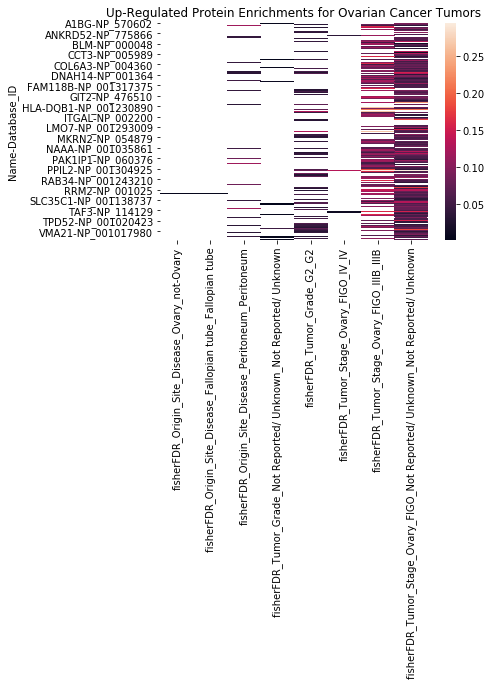

In [67]:
ax1 = plt.axes()
sns.heatmap(results_up, ax = ax1)
ax1.set_title('Up-Regulated Protein Enrichments for Ovarian Cancer Tumors')
plt.show()